In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as spy
import seaborn as sns


In [57]:
df = pd.read_csv(r'C:\DATA ANALYSIS\PYTHON\weather\Weather Data.csv')
df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [58]:
df.at[2, 'Weather'] = 'Fog'
df.at[3, 'Weather'] = 'Fog'

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [60]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

In [61]:
df['Date'] = df['Date/Time'].dt.date

df['Time'] = df['Date/Time'].dt.time


In [62]:
df.set_index('Date/Time', inplace=True)


In [63]:
df.drop_duplicates()
df.dropna()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Date,Time
Date/Time,,,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,2012-01-01,00:00:00
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,2012-01-01,01:00:00
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,Fog,2012-01-01,02:00:00
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,Fog,2012-01-01,03:00:00
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,2012-01-01,04:00:00
...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow,2012-12-31,19:00:00
2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow,2012-12-31,20:00:00
2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow,2012-12-31,21:00:00


<h4>        Visualize Seasonal Trends:

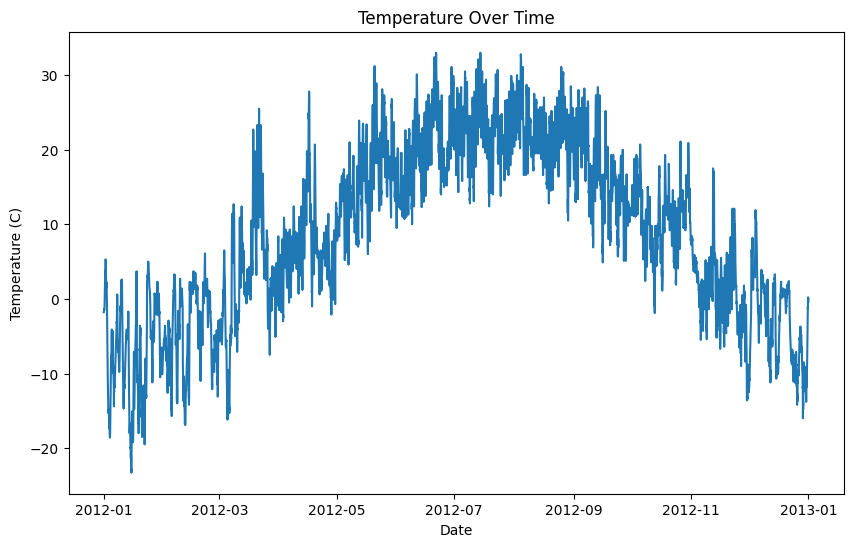

In [64]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df['Temp_C'])
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.show()


<h4>        Calculating Correlation Coefficients

In [65]:
correlation_matrix = df[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h']].corr()
print(correlation_matrix)


                    Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h
Temp_C            1.000000          0.932714  -0.220182        -0.061876
Dew Point Temp_C  0.932714          1.000000   0.139494        -0.095685
Rel Hum_%        -0.220182          0.139494   1.000000        -0.092743
Wind Speed_km/h  -0.061876         -0.095685  -0.092743         1.000000


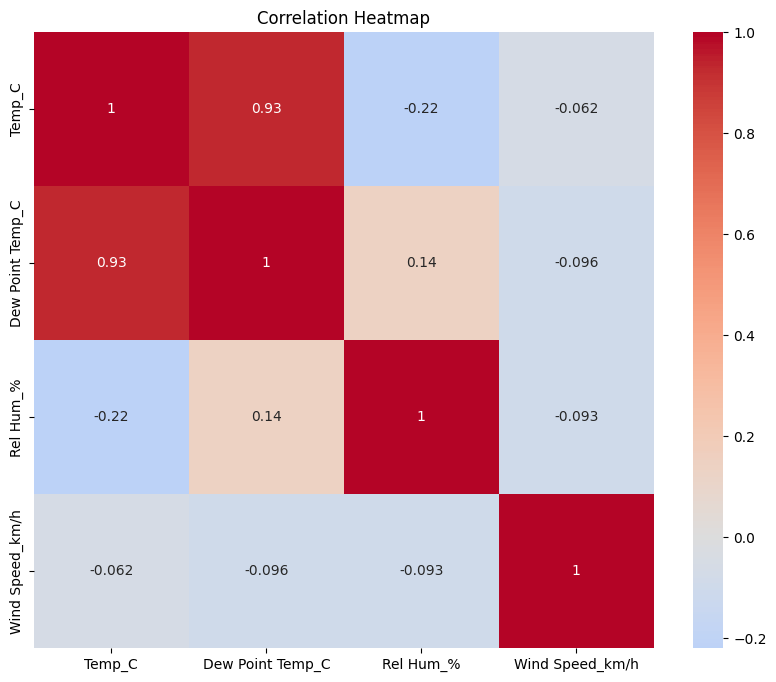

In [66]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

<h4>    How does Dew Point Temp_C (dew point temperature) relate to the Temp_C?

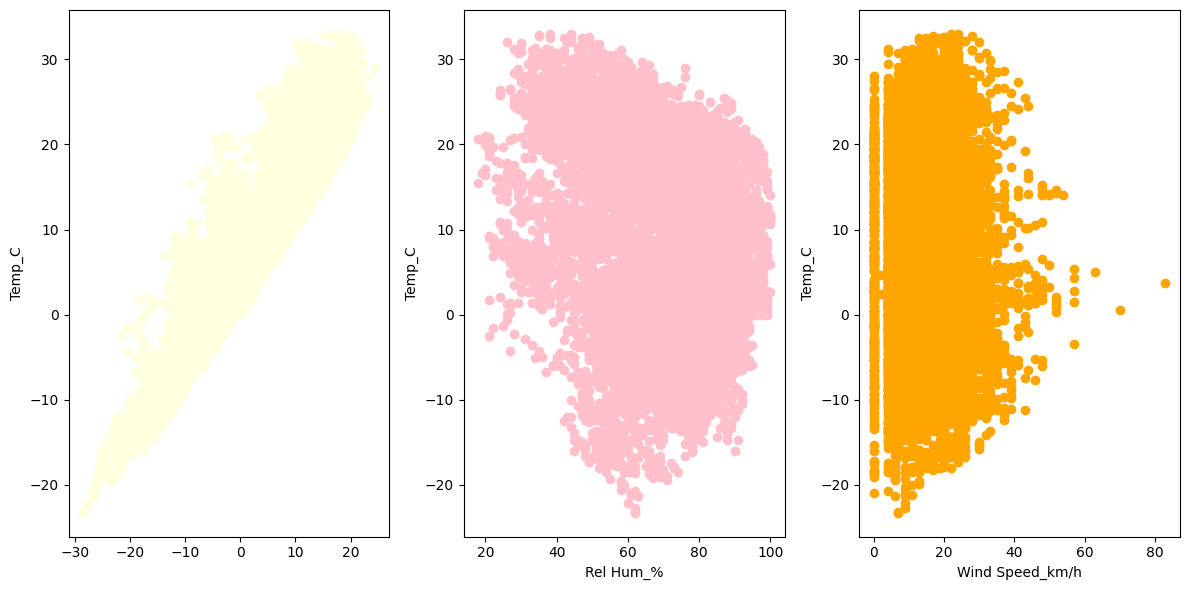

In [67]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.scatter(df['Dew Point Temp_C'], df['Temp_C'], color='#FFFFE0')
plt.ylabel('Temp_C')

plt.subplot(1, 3, 2)
plt.scatter(df['Rel Hum_%'], df['Temp_C'], color='#FFC0CB')
plt.xlabel('Rel Hum_%')
plt.ylabel('Temp_C')

plt.subplot(1, 3, 3)
plt.scatter(df['Wind Speed_km/h'], df['Temp_C'], color='#FFA500')
plt.xlabel('Wind Speed_km/h')
plt.ylabel('Temp_C')

plt.tight_layout()
plt.show()


<h4> Influence of Wind Speed on Temperature

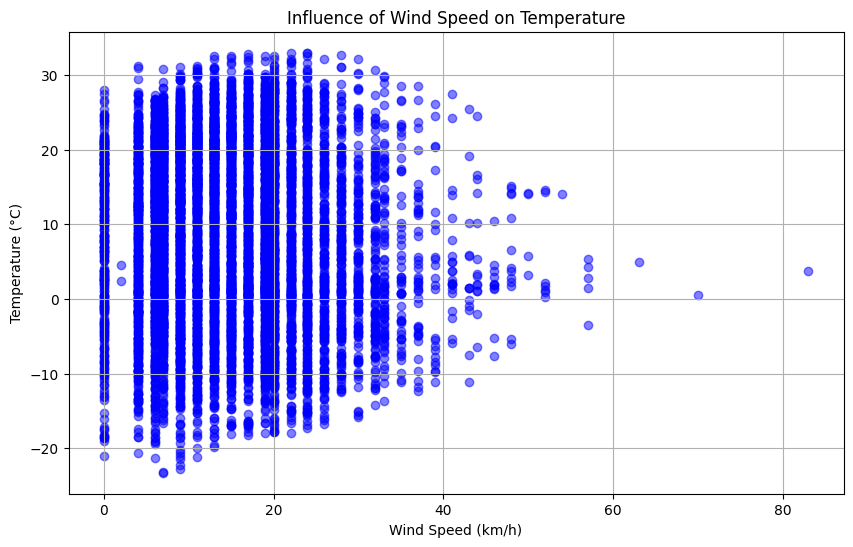

In [68]:

plt.figure(figsize=(10, 6))
plt.scatter(df['Wind Speed_km/h'], df['Temp_C'], color='blue', alpha=0.5)
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Temperature (°C)')
plt.title('Influence of Wind Speed on Temperature')
plt.grid(True)
plt.show()
